### Important Notes
Important link related to [EDA](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)<br>

Information related to RSRP, RSSI etc. can be found [here](https://www.signalbooster.com/blogs/news/acronyms-rsrp-rssi-rsrq-sinr#:~:text=There're%20many%20acronyms%20related,to%20Interference%20plus%20Noise%20Ratio.)

In [1]:
import numpy as np
import pandas as pd
 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

In [2]:
A = pd.read_excel('Measurements.xlsx', engine='openpyxl')

df = A.copy()
df.drop(columns=['No.', 'Latitude', 'Longitude', 'DateTime', 'Serving DL EARFCN_All Logs'], inplace = True)

# I remove all the '\t' from the string and then replace it with NaN. Later I will remove the NaNs
for r in range(0,len(df)):
    if type(df['PCC PHY Throughput DL_All Logs'][r]) == str:
        # df['PCC PHY Throughput DL_All Logs'][r] = df['PCC PHY Throughput DL_All Logs'][r].replace("\t", "") 
        df['PCC PHY Throughput DL_All Logs'][r] = np.nan
    
    if type(df['PDCP Throughput DL_All Logs'][r]) == str:
        # df["PDCP Throughput DL_All Logs"][r] = df["PDCP Throughput DL_All Logs"][r].replace("\t", "")
        df["PDCP Throughput DL_All Logs"][r] = np.nan
        
df.dropna(inplace = True)


df['Serving RSRP_All Logs'] = pd.to_numeric(df['Serving RSRP_All Logs'].values,  errors='coerce')
df['Serving RSRQ_All Logs'] = pd.to_numeric(df['Serving RSRQ_All Logs'].values,  errors='coerce')
df['Serving RSSI_All Logs'] = pd.to_numeric(df['Serving RSSI_All Logs'].values,  errors='coerce')
df['Serving PCC SINR_All Logs'] = pd.to_numeric(df['Serving PCC SINR_All Logs'].values,  errors='coerce')
df['PCC PHY Throughput DL_All Logs'] = pd.to_numeric(df['PCC PHY Throughput DL_All Logs'].values,  errors='coerce')
df['PDCP Throughput DL_All Logs'] = pd.to_numeric(df['PDCP Throughput DL_All Logs'].values,  errors='coerce')

df.columns = ['RSRP', 'RSRQ', 'RSSI', 'PCC_SINR', 'PCC_PHY_Thruput_DL', 'PDCP_Thruput_DL']

df.reset_index(drop = True, inplace =True)

df.head(5)

,RSRP,RSRQ,RSSI,PCC_SINR,PCC_PHY_Thruput_DL,PDCP_Thruput_DL
2,-70.77,-8.66,-48.02,7.83,8737.41,7204.20
3,-72.40,-10.56,-47.17,4.95,6969.09,5073.57
4,-71.32,-10.13,-47.11,5.65,3874.06,2846.46
5,-69.92,-9.62,-46.18,6.95,5575.82,5308.10
6,-72.43,-10.30,-47.74,4.28,6114.99,3678.47


In [12]:
df.to_csv('data/data_ready_ML.csv', index = False)

<AxesSubplot:>

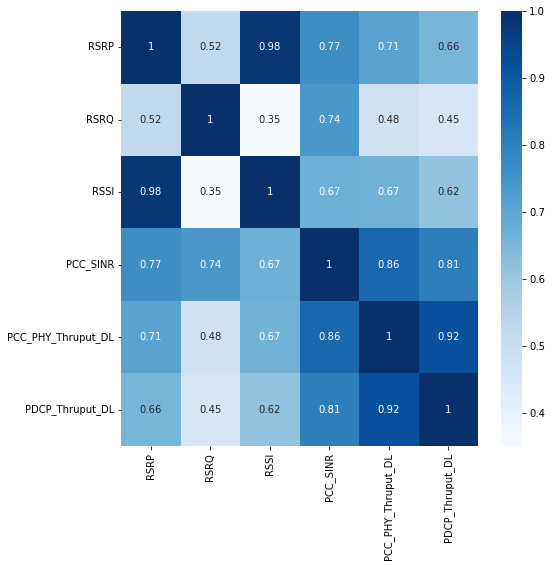

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='PCC_SINR',y='PCC_PHY_Thruput_DL', data=df)
plt.xlabel('SINR')
plt.ylabel('PCC PHY Throutput (DL)')

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x='RSRP',y='PCC_PHY_Thruput_DL', data=df)
plt.xlabel('RSRP (dB)')
plt.ylabel('PCC PHY Throutput (DL)')

In [ ]:
sns.boxplot(x='PCC_PHY_Thruput_DL',y='PCC_SINR',data=df)